In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
# pd.options.display.max_rows = 999
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pprint import pprint

- In this exercise, we will apply an extension of PCA, namely Sparse PCA, on sentiment analysis of Amazon review dataset (https://www.kaggle.com/bittlingmayer/amazonreviews).
- Since the original dataset is huge, we only use the test set as our training and testing data.

# Import dataset
- Load the text file containing 400K Amazon customer reviews using 'with open...'
- Split the array loaded into dataframe df with two columns: review, sentiment
- Given \__label__1: 1/2 star(s) review, \__label__2: 4/5 stars review, transform sentiment column by using mapping {'\__label__1':0, '\__label__2':1}

In [2]:
# import amazon review data


,sentiment,review
0,1,Great CD: My lovely Pat has one of the GREAT v...
1,1,One of the best game music soundtracks - for a...
2,0,Batteries died within a year ...: I bought thi...
3,1,"works fine, but Maha Energy is better: Check o..."
4,1,Great for the non-audiophile: Reviewed quite a...


- Plot a bar chart to see the number of positive and negative labels.

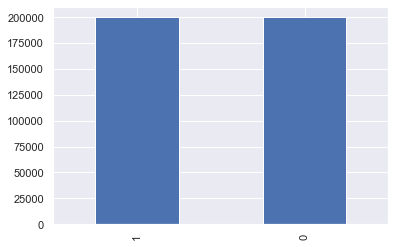

In [3]:
# bar chart showing value of two labels


- Take a look at first 10 pieces of text

In [4]:
data[:10]

[['__label__2',
  'Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n'],
 ['__label__2',
  "One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as the

- The dataset is still large, we would like to take a subset of 20k positive data and 20k negative data for our purpose.
- Using df.groupby(), take a stratified sample of size 40k.

In [5]:
# stratified sampling of 40000 data


1    20000
0    20000
Name: sentiment, dtype: int64

# Text preprocessing
- From the above samples, we can see that there are punctuations, line breaks and digits which are not very useful in predicting sentiment in the first sense.
- Remove punctuations by using regex and Series.str.replace() and assign the result to a new column named 'clean_review'.
- Remove line breaks and digits by using regex and Series.str.replace().
- Convert clean reviews to lowercase using Series.str.lower().

In [6]:
# remove punctuations 


In [7]:
# remove digits and line breaks


# Calculate TF-IDF of text
- Using sklearn TfidfVectorizer, extract tf-idf features from text column
<!-- - Set stop_words parameter to 'english' to neglect stopwords -->

In [8]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer


(40000, 99976)
Wall time: 3.64 s


- Check the number of vocabularies we have in total, and print the first and last 500 vocabularies to see if there is any issue.

In [9]:
print('vocab size', len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names()[:500])
print(vectorizer.get_feature_names()[-500:])

vocab size 99976
['__', '_____', '______', '_______', '_________________', '_a', '_basic_', '_betrayal', '_could_', '_currents', '_dark', '_descent', '_elements', '_except_', '_honoring', '_hostile', '_if', '_is_', '_k', '_may_', '_not_', '_perception_', '_please', '_real_', '_really_', '_ren_', '_seems_', '_should_', '_soul', '_spy', '_star', '_starship', '_taut_', '_the', '_thinking', '_this_is_major_crap_', '_truce', '_very_', '_will_', '_with_', 'aa', 'aaa', 'aaaaaaarrrrrrrrrggggghhhhh', 'aaaaaghwhat', 'aaaaahhhhhhhhhhhhhhvery', 'aaaaargh', 'aaaaarrrrrgggghhhhhhaaaaa', 'aaaah', 'aaaannnddd', 'aaaarghno', 'aaas', 'aac', 'aakers', 'aalayiah', 'aaliyah', 'aams', 'aana', 'aand', 'aanipada', 'aaos', 'aaragon', 'aardema', 'aardvark', 'aaron', 'aarons', 'aarp', 'aarrghtrite', 'aas', 'aasumes', 'aatrix', 'ab', 'aba', 'abacab', 'aback', 'abacus', 'abagail', 'abagailking', 'abandoment', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abandonso', 'abanes', 'abaraham', 'abarc

There are many expressions with underlines. One could search for some of them in review using Series.str.contains(), and sees that some of these has actual emotional meaning, so let's keep them first.

In [10]:
X

<40000x99976 sparse matrix of type '<class 'numpy.float64'>'
	with 2181092 stored elements in Compressed Sparse Row format>

# Apply Sparse PCA for dimensional reduction

- X is a <b>sparse matrix</b>, meaning it consists mostly of 0, because in a review it usually contains only few words of the vocabulary list. It is stored in Python as compressed sparse matrix (csr_matrix), which is different from normal np.array to maximize storing efficiency.
- Before applying Sparse PCA, one have to use Truncated SVD (Single Value Decomposition) to <b>transform the sparse array into dense array first</b>.
- Using sklearn <b>TruncatedSVD</b> with parameters n_components=100, n_iter=10, random_state=42, transform sparse matrix X into a dense matrix X_svd.

In [11]:
%%time
from sklearn.decomposition import TruncatedSVD


X_svd.shape (40000, 1000)
svd explained variance 0.4256504492802775
Wall time: 2min 24s


- Using sklearn <b>SparsePCA</b> with parameters n_components=10, random_state=42, perform dimensional reduction on X_svd to form new feature named X_spca with 10 dimensions only.

In [ ]:
%%time
from sklearn.decomposition import SparsePCA


# Train SVM model
- First split dataset to train and test sets using X = df['clean_review'] and y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split


- Construct a pipeline using sklearn make_pipeline for TfidfVectorizer, TruncatedSVD, SparsePCA and SVC with linear kernel.
- Validate model performance on test set using accuracy_score.

In [ ]:
%%time
# make model pipeline and fit train data
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


- Construct another pipeline without TruncatedSVD and SparsePCA.
- Validate model performance on test set using accuracy_score.

In [ ]:
%%time
# model without svd spca


Prediction using SVD and PCA <b>sacrifices 10% accuracy for 10 times shorter computational time</b>. Therefore it could be used for a fast testing purpose under the circumstances.